In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:

def exp(x,lamda):
    result = lamda*np.exp(-lamda*x)
    return result

# метод, который определяет парметры распределений заданного набора числей, входящих в смесь распределений
def EM_method(x,k,eps = 1e-10, tries = 30, Qmax = 100):
    g_delta = 1
    g_w = np.zeros(k)
    g_lamda = np.zeros(k)

    for tr in range(tries):
        n = len(x)
        g = np.random.rand(k,n)
        w = np.random.rand(k)
        lamda = np.random.rand(k)

        delta = 1
        iter = 0
        prev_delta = 2
        prev_w = np.zeros(k)
        prev_lamda = np.zeros(k)

        while delta >= eps and iter <= Qmax and delta < prev_delta:
            prev_delta = delta
            prev_lamda = lamda
            prev_w = w
            iter += 1

            #E step
            g0 = g.copy()

            for i in range(k):
                for j in range(n):
                    det = 0
                    for v in range(k):
                        det += w[v]*exp(x[j],lamda[v])
                    g[i][j] = w[i]*exp(x[j],lamda[i])/det

            delta = np.max(np.absolute(g0-g))

            #M step
            for i in range(k):
                sumG = 0
                sumGX = 0

                for j in range(n):
                    sumG += g[i][j]
                    sumGX += g[i][j]*x[j]
                
                kek = np.sum(g)

                lamda[i] = sumG / sumGX
                w[i] = sumG/kek
        
            #print('Delta')
            #print(delta)
    
        #print('Itterations')
        #print(iter)
        
        if (prev_delta < delta):
            delta = prev_delta
            lamda = prev_lamda
            w = prev_w

        if (delta < g_delta):
            print('Found good delta')
            print(delta)
            g_delta = delta
            g_w = w
            g_lamda = lamda
    
        print('Try')
        print(tr+1)
    
    print('Done')
    print(g_delta)
    return g_w, g_lamda

#P[i] = w[i] * norm(x,lamda[i])
#P = sum(P[i])





                





(array([1581.,  241.,  107.,   44.,   19.,    0.,    6.,    0.,    0.,
           2.]),
 array([6.19045968e-04, 3.67235670e+00, 7.34409434e+00, 1.10158320e+01,
        1.46875696e+01, 1.83593073e+01, 2.20310449e+01, 2.57027826e+01,
        2.93745202e+01, 3.30462579e+01, 3.67179955e+01]),
 <BarContainer object of 10 artists>)

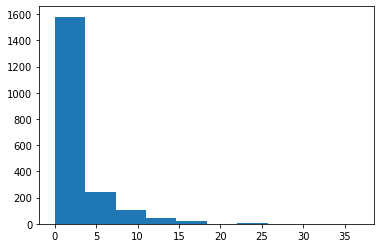

In [12]:
from numpy import random

#scale = 1/lamda

a1 = (random.exponential(scale=0.5, size=(1, 1000)))
a2 = (random.exponential(scale=4, size=(1, 1000)))

X = np.concatenate((a1,a2),axis = None)

plt.hist(X)




In [13]:
X.shape

(2000,)

In [30]:
k = 2

eps = 0.6

Qmax = 100
tryes = 5

w,lamda = EM_method(X,k,eps,tryes,Qmax)

Found good delta
0.12194071086994929
Try
1
Try
2
Found good delta
0.11154370339589564
Try
3
Try
4
Try
5
Done
0.11154370339589564


In [31]:
print(w)
print(lamda)

[0.59721435 0.40278565]
[0.29852093 1.16978451]


0.597214354294531
0.4027856457054695


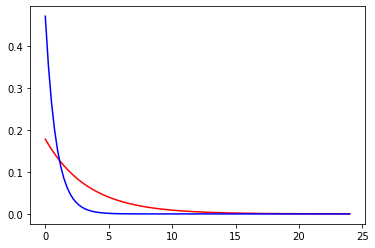

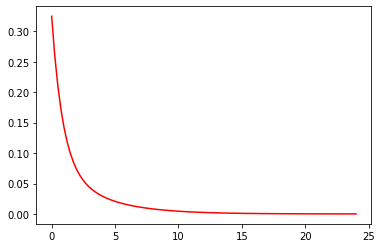

(array([0.21529316, 0.03281825, 0.01457076, 0.00599171, 0.00258733,
        0.        , 0.00081705, 0.        , 0.        , 0.00027235]),
 array([6.19045968e-04, 3.67235670e+00, 7.34409434e+00, 1.10158320e+01,
        1.46875696e+01, 1.83593073e+01, 2.20310449e+01, 2.57027826e+01,
        2.93745202e+01, 3.30462579e+01, 3.67179955e+01]),
 <BarContainer object of 10 artists>)

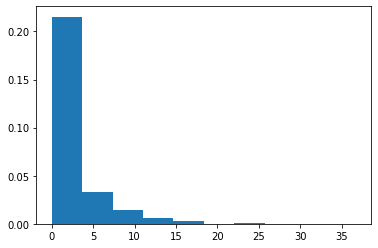

In [32]:
# 100 linearly spaced numbers
x = np.linspace(0,24,100)

# the function, which is y = x^2 here
y = 0
for i in range(k):
    print(w[i])
    y += w[i] * exp(x,lamda[i]) /k

# setting the axes at the centre
fig = plt.figure()



y1 = w[0] * exp(x,lamda[0])
y2 = w[1] * exp(x,lamda[1])

# plot the function
plt.plot(x,y1, 'r')
plt.plot(x,y2, 'b')

plt.show()

# setting the axes at the centre
fig = plt.figure()

# plot the function
plt.plot(x,y, 'r')



# show the plot
plt.show()

plt.hist(X, density=True)
